In [19]:
import numpy as np
from scipy.signal import butter, freqz
from matplotlib import pyplot as plt

sample_rate = 44100.

In [28]:
f_cut = 1000.
q_factor = np.sqrt(2.)/2.
fs = sample_rate

omega = 2 * np.pi * f_cut
omega_2 = omega * omega
q = 1. / q_factor
omega_q = omega * q
bfactor_highpass = 4 * fs * fs

b = np.array([1., -2., 1.]) * bfactor_highpass
a = np.array([
    2. * fs * (2. * fs + omega_q) + omega_2,
    -8. * fs * fs + 2. * omega_2,
    2. * fs * (2. * fs - omega_q) + omega_2])
norm_coeff = 1./a[0]
b *= norm_coeff
a *= norm_coeff

In [29]:
b_ref, a_ref = butter(2, f_cut/fs*2, btype="high")

In [30]:
print(b)
print(b_ref)
print(a)
print(a_ref)

[ 0.90430591 -1.80861182  0.90430591]
[ 0.9041522  -1.80830441  0.9041522 ]
[ 1.         -1.7994334   0.81779024]
[ 1.         -1.79909641  0.8175124 ]


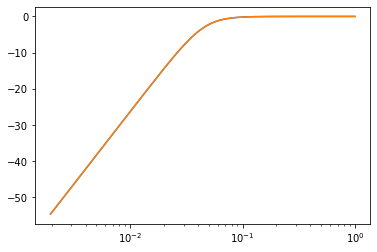

In [31]:
w, h_ref = freqz(b_ref, a_ref)
w, h = freqz(b, a)

plt.semilogx(w/np.pi, 20*np.log10(np.abs(h_ref)), w/np.pi, 20*np.log10(np.abs(h)))